In [1]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
# Saving settings
%autosave 180
%load_ext autoreload
%autoreload 2

# Computing
import numpy as np

# Files
import pandas as pd
import os
import glob

from tqdm import tqdm

from utils_nathalie import Volition

Autosaving every 180 seconds


In [71]:
####################################################       
####################################################       
####################################################       
#
root_dir = "/media/cat/4TB/donato/nathalie"
animal_id = "DON-007050"

# "DON-007050"
# "DON-007417"
# "DON-007021"


#######
vol = Volition(root_dir, 
               animal_id)


vol.convert_locations()

vol.session_ids = ["FS9"]

#
print ("DONE...")

100%|██████████| 12/12 [00:00<00:00, 39537.82it/s]

DONE...


In [3]:
##########################################################
################### DECODE ALL PERIODS ###################
##########################################################

#
vol.overwrite_bayes = True
vol.use_place_cells_bayes = False
vol.shuffle_bayes = False

#
vol.speed_threshold = 2
vol.train_bayes()
 

print ("DONE")

TODO: use start offset for mouse 7050: 
Time moving:  748.3 , time not moving:  1051.7
total time, total cells:  (14966, 365)
length of moving period:  748.3 sec
Frames with non-zero activity:  672.85  sec.
# cells with some activity in the period:  (288,)


100%|██████████| 20456/20456 [00:16<00:00, 1210.96it/s]



DONE


/home/cat/.conda/envs/donato/lib/python3.8/site-packages/numpy/lib/npyio.py:696: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


[[ 0.  8. 16. 24. 32. 40. 48. 56.]
 [ 1.  9. 17. 25. 33. 41. 49. 57.]
 [ 2. 10. 18. 26. 34. 42. 50. 58.]
 [ 3. 11. 19. 27. 35. 43. 51. 59.]
 [ 4. 12. 20. 28. 36. 44. 52. 60.]
 [ 5. 13. 21. 29. 37. 45. 53. 61.]
 [ 6. 14. 22. 30. 38. 46. 54. 62.]
 [ 7. 15. 23. 31. 39. 47. 55. 63.]]
10


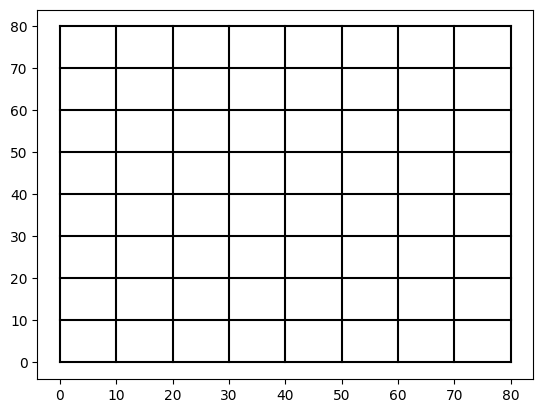

In [67]:
###############################################
###############################################
###############################################
vol.session_id = "FS9"
vol.plot_grid()
#


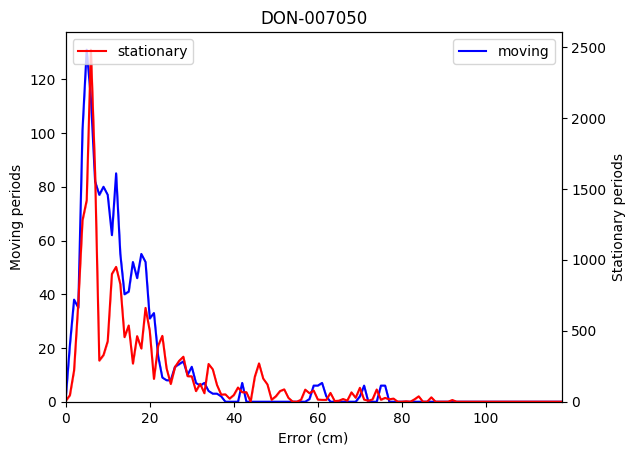

In [68]:
## ################## PLOT ERRORS ####################
###################################################
#
# visualize decoding results
vol.use_place_cells_bayes = False

#
vol.plot_decoder_errors()
    

non-zero [ca], i.e. active frames:  (1254,)
idx mobile periods:  (1254,)
imm true:  (1254, 2)


100%|██████████| 500/500 [00:06<00:00, 82.19it/s]


non-zero [ca], i.e. active frames:  (1254,)
idx mobile periods:  (1254,)
imm true:  (1254, 2)


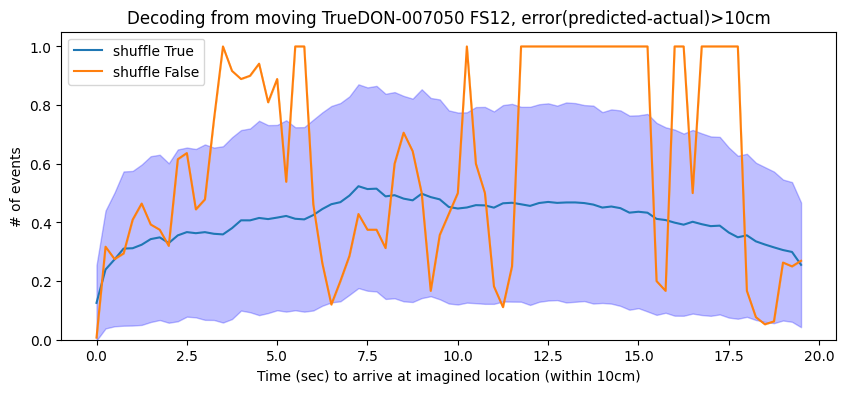

In [66]:
##########################################################
########### FORWARD / BACKWARD MATCHES ANALYSIS ##########
##########################################################
#
vol.n_sec = 20   # no. of seconds to search forward and backward in time
vol.fps = 20    # imaging rate
vol.min_dist_difference = 10                  # how far must the imagined location from current location be in order to consider it a projected location
vol.min_dist_approached = 10   # how close must the mouse come ot the imagined location

vol.bin_width = 0.25
vol.n_shuffles = 500
vol.session_id = "FS12"
vol.direction = 'forward'  # 'forward', 'backward'
vol.mobile = True
#

# process data
shuffles= [True, False]
plt.figure(figsize=(10,4))
ax=plt.subplot(111)
colors=['blue','orange']
for ctr,shuffle in enumerate(shuffles):
    vol.shuffle_match = shuffle

    #
    vol.get_matches_forward_backward()

    #
    plt.plot(vol.x, vol.hist, label='shuffle '+str(vol.shuffle_match))
    
    #
    ax.fill_between(vol.x, vol.hist - vol.std, vol.hist + vol.std,
                    color=colors[ctr], alpha=.25)

plt.xlabel("Time (sec) to arrive at imagined location (within "+str(vol.min_dist_approached)+"cm)")
plt.legend()
plt.ylabel("# of events")
plt.ylim(bottom=0)
plt.title("Decoding from moving "+ str(vol.mobile) + vol.animal_id + " " + vol.session_id + ", error(predicted-actual)>"+str(vol.min_dist_difference)+"cm")
plt.savefig('/home/cat/imaginge.png')
plt.show()


(7760,) (7760,)


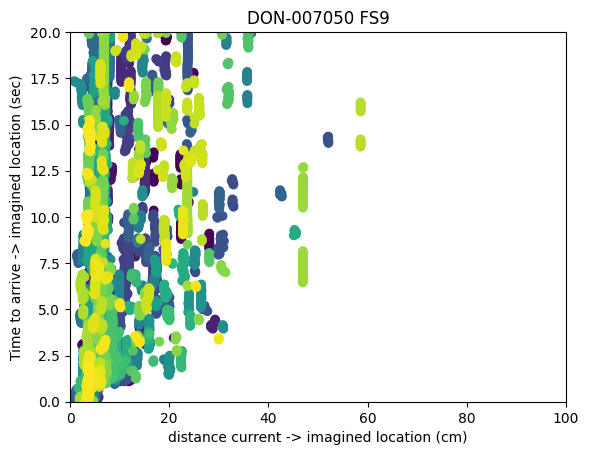

In [8]:
#########################################################
############ TIME vs. DISTANCE IMAGINED LOCATIONS #######
#########################################################

#
dists_array = np.hstack(vol.dists_array)
match_array = np.hstack(vol.match_times_array)
print (dists_array.shape, match_array.shape)

plt.figure()
plt.scatter(dists_array, 
            match_array,
           c=np.arange(dists_array.shape[0]))
    
plt.xlabel("distance current -> imagined location (cm)")
plt.ylabel("Time to arrive -> imagined location (sec)")
plt.xlim(0,100)
plt.ylim(0,vol.n_sec)
plt.title(vol.animal_id + " "+ vol.session_id)
plt.show()


In [9]:
################################################
################################################
################################################
#
fname = os.path.join(vol.root_dir,
                    vol.animal_id,
                    vol.session_id,
                    'bayes_decoder_place_cells_False.npz')
print (fname)
data = np.load(fname, allow_pickle=True)

#
idx_imm = data['idx_imm']
idx_mob = data['idx_mob']
speed = data['speed']

#
print (speed.shape, idx_imm.shape, idx_mob.shape)

#
imm_bouts = vol.get_bouts(idx_imm)
mob_bouts = vol.get_bouts(idx_mob)
print (imm_bouts.shape, mob_bouts.shape)


/media/cat/4TB/donato/nathalie/DON-007050/FS9/bayes_decoder_place_cells_False.npz
(36000,) (21034,) (14966,)
(139, 2) (140, 2)


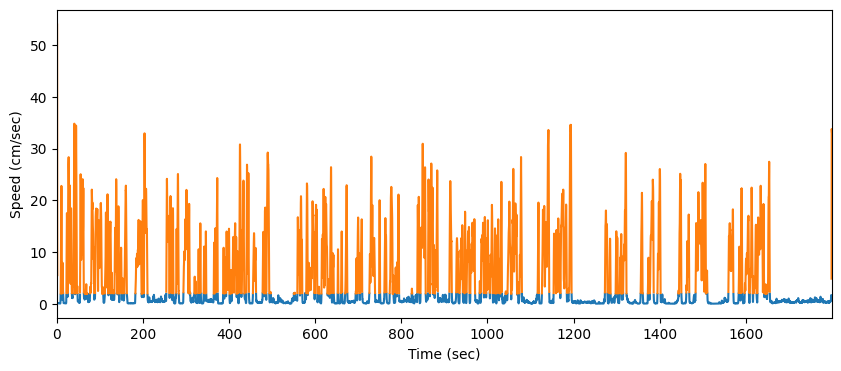

In [10]:
plt.figure(figsize=(10,4))
x = np.arange(speed.shape[0])/vol.fps
idx = np.where(speed > vol.speed_threshold)[0]
idx2 = np.where(speed < vol.speed_threshold)[0]

#
x1 = x.copy()
x2 = x.copy()
speed1 = speed.copy()
speed2 = speed.copy()

#
speed1[idx]=np.nan
x1[idx]=np.nan

#
x2[idx2]=np.nan
speed2[idx2]=np.nan
#
plt.plot(x1,speed1)
plt.plot(x2,speed2)
plt.xlim(x[0],x[-1])
plt.xlabel("Time (sec)")
plt.ylabel("Speed (cm/sec)")

plt.show()

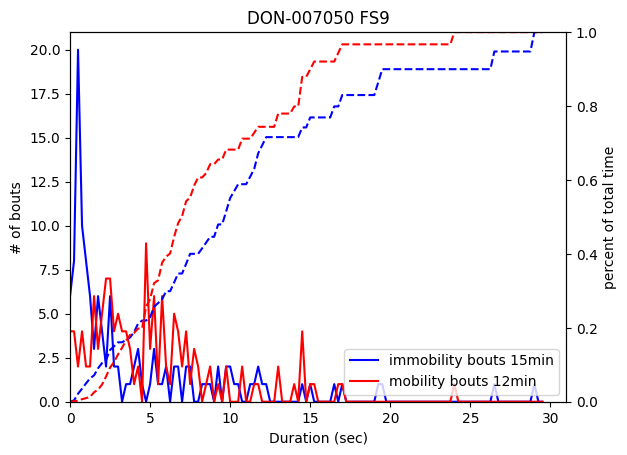

In [18]:
plt.figure()
ax =plt.subplot(1,1,1)
temp = (imm_bouts[:,1]-imm_bouts[:,0])/vol.fps
y1 = np.histogram(temp, bins=np.arange(0,30,.25))
x = y1[1][:-1]
plt.plot(x,y1[0], c='blue',label='immobility bouts '+str(int(temp.sum()/60))+"min")


#
temp = (mob_bouts[:,1]-mob_bouts[:,0])/vol.fps
y2 = np.histogram(temp, bins=np.arange(0,30,.25))
plt.plot(x,y2[0], c='red', label='mobility bouts '+str(int(temp.sum()/60))+"min")
plt.legend(loc=4)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.ylabel("# of bouts")
plt.xlabel('Duration (sec)')

#
ax2 = ax.twinx()
c = np.cumsum(y1[0]*y1[1][:-1])
c = c/np.max(c)
ax2.plot(x,c, '--',c='blue')
ax2.set_ylim(0,1)
ax2.set_xlim(left=0)

c = np.cumsum(y2[0]*y2[1][:-1])
c = c/np.max(c)
ax2.plot(x,c, '--',c='red')
ax2.set_ylabel("percent of total time")
plt.title(vol.animal_id + " " + vol.session_id)
plt.savefig('/home/cat/bouts.png')
plt.show()



In [11]:
plt.figure()

x = np.arange(speed.shape[0])/20.
plt.plot(x[idx_imm],speed[idx_imm],
        c='red')

plt.plot(x[idx_mob],speed[idx_mob],
        c='blue')

plt.xlim(x[0],x[-1])
plt.ylim(bottom=0)
plt.show()

In [12]:
####################################################

plt.figure()
plt.scatter(y_test[:,0],y_test[:,1],
            c=np.arange(y_test.shape[0]),
            s=distances_bayes*5,
            cmap='viridis')

#
plt.scatter(y_bayes[:,0],
            y_bayes[:,1],
            c=np.arange(y_bayes.shape[0]),
            cmap='magma')

#
plt.show()

NameError: name 'y_test' is not defined

In [13]:
####################################################################################################
########## TEST WHETHER MOUSE GOES THROUGH PREDICTED LOCATION IN PREVIOUS / FUTURE PERIODS #########
####################################################################################################

n_frames = 18

#
print (idx_imm[:n_frames])

#
print (y_bayes[:n_frames])

#

print (X_test[:n_frames])

#
s = X_test[:n_frames]-X_test[0]
print (s.sum())

#
for k in range(n_frames):
    idx = np.where(X_test[k]!=0)
    print (idx)


[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


NameError: name 'y_bayes' is not defined

In [14]:
d = np.load('/media/cat/4TB/donato/nathalie/DON-007050/FS1/place_cells.npy',
            allow_pickle=True)
print (d[0])

{'cell_id': 3, 'overlaps': [0.6558441558441559], 'spatial_info': [2.5525348609366976, 2.8140883482451713, 2.8286039804275, 0.9101248643011705, 1.3278752092892459, 1.3438674239649162, 1.123412603243331, 1.1561605631378915, 1.279342196542679, 1.8810676337781347, 1.7794684847830269, 1.2194517187141143, 1.2052842898692484, 1.1272377625249013, 1.1384000457492287, 1.1005289049304603, 1.5166405132421887, 1.4257672055011121, 1.1602136256409907, 1.1280544425648, 1.3793781677164407, 1.2206092962501665, 0.7943263602749769, 1.0991272043024367, 1.1466281439664288, 1.4946472634710573, 1.0346702957677676, 1.2568657912060663, 1.4666418088167332, 1.433578790880422, 1.3533591571273524, 1.4324653299697256, 1.1849935265293163, 1.134931905941554, 1.0065756336695728, 1.3099695445839674, 1.1245261148370511, 1.107881202186656, 1.2497142471880751, 1.7295170845657972, 1.4564907905192284, 1.1485146897273082, 1.6544858111817515, 1.2650603039306907, 1.0945374114345914, 1.1024764307211343, 1.298403967208392, 1.2592